# Supervised Learning Final Project

## Introduction

Diabetes is a prevalent and serious health condition characterized by high blood sugar levels resulting from insufficient insulin production or ineffective insulin utilization in the body. Accurately predicting an individual's risk of developing diabetes is crucial for healthcare professionals to identify high-risk individuals and implement timely interventions and preventive strategies. In this project, we aim to address a classification problem using supervised learning techniques. The objective is to leverage a combination of medical and demographic data to develop a predictive model to predict the likelihood of developing diabetes.

## Data Source

- Owner: Mohammed Mustafa
- Kaggle. (n.d.). Diabetes prediction dataset. Retrieved from https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


## Data Description

The data includes features:

- Demographic:
 - Gender: The biological sex of the individual.
 - Age: The age of the individual.
 
- Medical Records:
 - BMI: Body mass index.
 - Hypertension: Indicates whether the individual has hypertension or not.
 - Heart_disease: Indicates whether the individual has a heart disease or not.
 - HbA1c: The level of Hemoglobin A1c, which measures the average blood sugar level over the past 2-3 months.
 - Blood_glucose_level: The amount of glucose in the bloodstream at a given time.
 
- Behavioral:
 - Smoking_history: Indicates the individual's smoking habits. There are six categories: Never, No info, Ever, Not Current, Current, Former.

- Target variable:
 - Diabetes: Binary variable. The value 1 indicates the presence of diabetes, while the value 0 represents the absence of diabetes.

## The Data Preparation

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from tabulate import tabulate
import plotly.graph_objects as go
from sklearn.datasets import make_classification

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)



random_state = 2023 ## random number seed

### Load the Dataset

In [2]:
# load the dataset
data = pd.read_csv("diabetes_prediction_dataset.csv")

### Explore the data

The dataset was obtained from Kaggle, and it consists of tabulated data with 100,000 observations. The dataset comprises a total of 9 columns, where 8 columns represent the predictor variables, and the remaining column represents the target variable.

In [3]:
# get the size of the dataset
num_rows, num_columns = data.shape

# print the size of the dataset
print(f"Number of rows:{num_rows}")
print(f"Number of columns:{num_columns}")

Number of rows:100000
Number of columns:9


The summary of each variable is as follows. It provides information about the column names and data types. Additionally, it is worth mentioning that no null values are present in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


We can get a sense of the data structure by examining the first five rows.

In [5]:
# display the first 5 rows in the dataset
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# get sense of range values of numerical predictors
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Although the differences among the value ranges of each feature are not large, it is still beneficial to standardize the predictors to improve model performance. Additionally, it is worth noting that some columns, such as BMI, may contain extremely high values based on domain knowledge. This could be potential outliers.

### Clean the Dataset

Due to the dataset containing a large number of observations, it is necessary to eliminate duplicate rows. There are 96146 rows after removing the duplicated rows.

In [7]:
# remove the duplicate data
data = data.drop_duplicates(keep="first")

The next step involves adjusting the data type of features that are not appropriately assigned to ensure compatibility with their characteristics. Let's check the datatype and unique value of each feature first. There are four features that should be treated as categorical, while the remaining four features are numerical.

In [8]:
# confirm the data types of features are all appropariate.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [9]:
for col in data.columns:
    print(col,np.unique(data[col]))

gender ['Female' 'Male' 'Other']
age [ 0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88  1.
  1.08  1.16  1.24  1.32  1.4   1.48  1.56  1.64  1.72  1.8   1.88  2.
  3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.
 15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.
 27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.
 39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.
 51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.
 63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.   74.
 75.   76.   77.   78.   79.   80.  ]
hypertension [0 1]
heart_disease [0 1]
smoking_history ['No Info' 'current' 'ever' 'former' 'never' 'not current']
bmi [10.01 10.08 10.14 ... 91.82 95.22 95.69]
HbA1c_level [3.5 4.  4.5 4.8 5.  5.7 5.8 6.  6.1 6.2 6.5 6.6 6.8 7.  7.5 8.2 8.8 9. ]
blood_glucose_level [ 80  85  90 100 126 130 140 145 155 158 159 160 200 220 240 260 280 300]
diabetes [0 1]


We will encode the 'gender','hypertension','heart_disease','smoking_history','diabetes' columns and set their data type as categorical.

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode multiple columns
for column in ['gender', 'hypertension', 'heart_disease','smoking_history','diabetes']:
    #data[column] = label_encoder.fit_transform(data[column])
    data[column] = data[column].astype('category')



## EDA Process

### Pairplot of Data

First, let's plot the pairplot of the features to visualize relationships between two features.

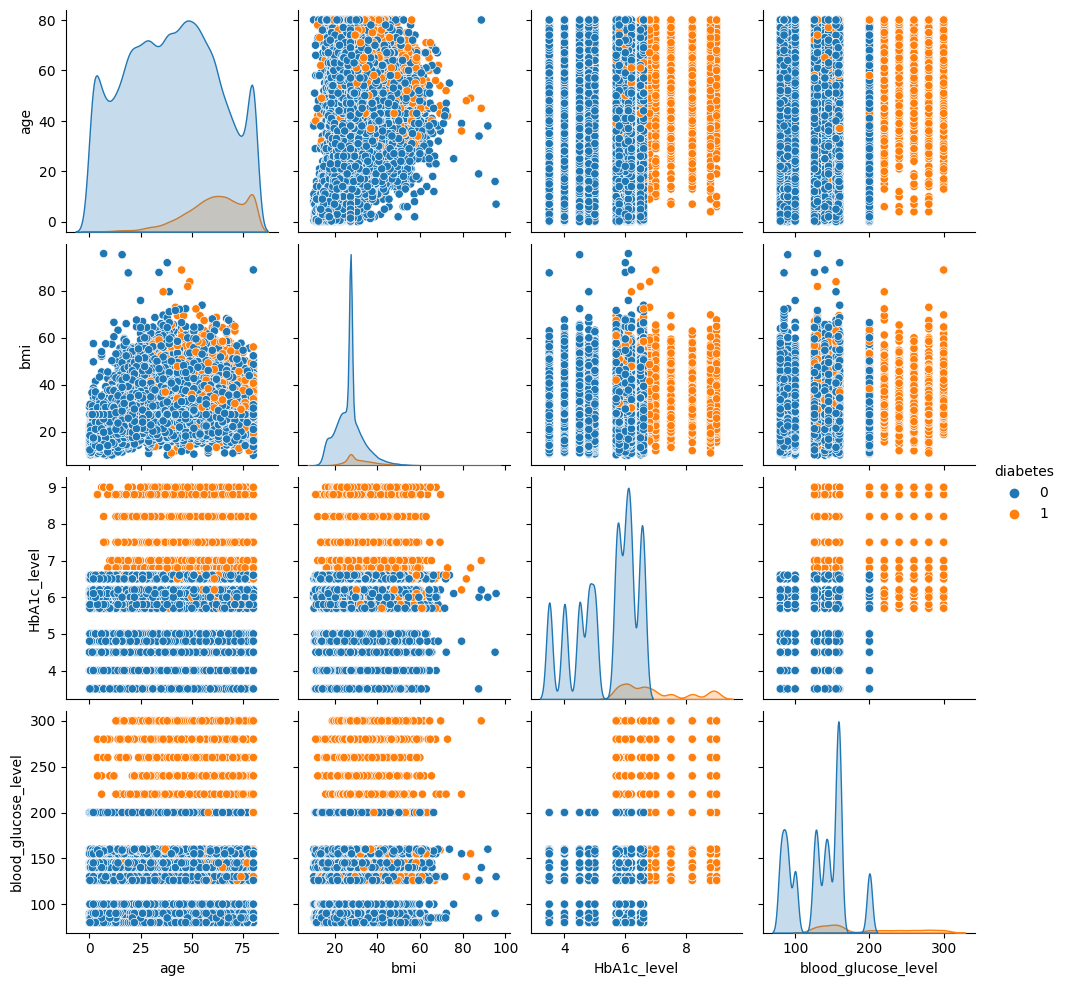

In [11]:
# Pairplot
sns.pairplot(data, hue='diabetes')

Based on the pairplot, there doesn't appear to be a clear linear relationship between any two numerical features. This suggests that these features are relatively independent of each other. And it is also obvious that HbA1c_level and blood_gluose_level are well correlated with the status of diabetes, demonstrating these two are important predictors for diabetes. The data fits well with current understanding of diabetes pathopysiology.

### Distribution of predictors

The distribution of predictors is visualized using histograms, and it is observed that the age and BMI variables exhibit a tendency towards normalization. And all categorical features are imbalanced.

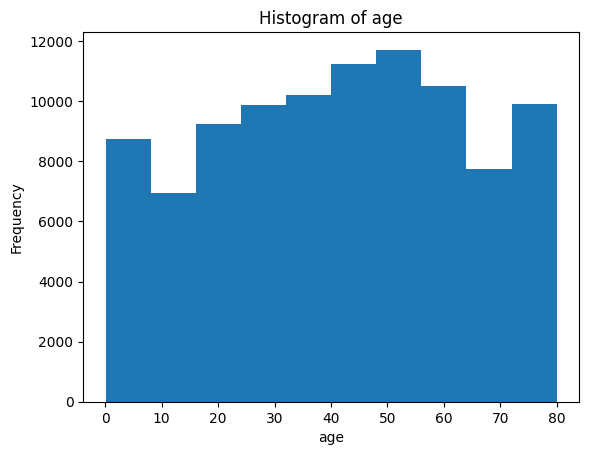

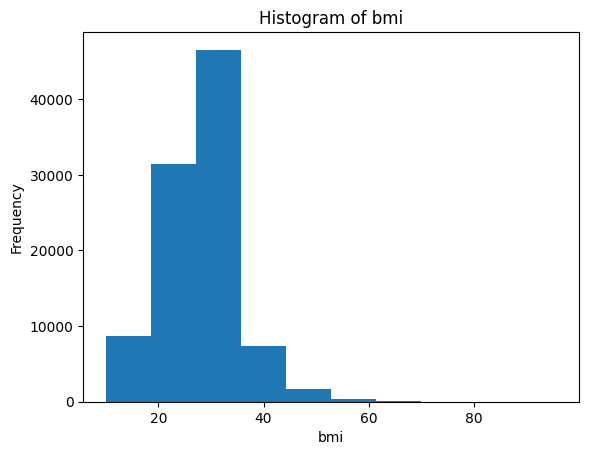

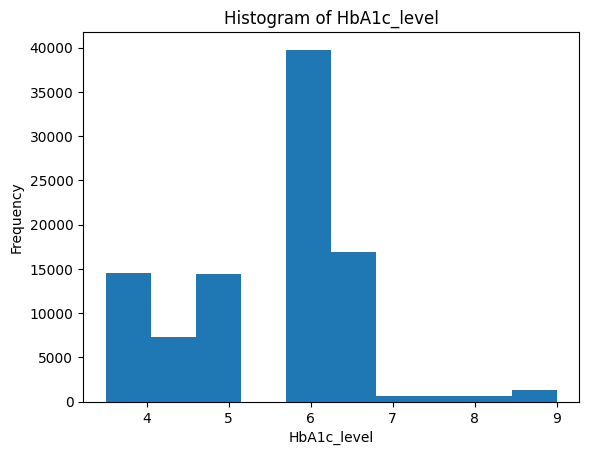

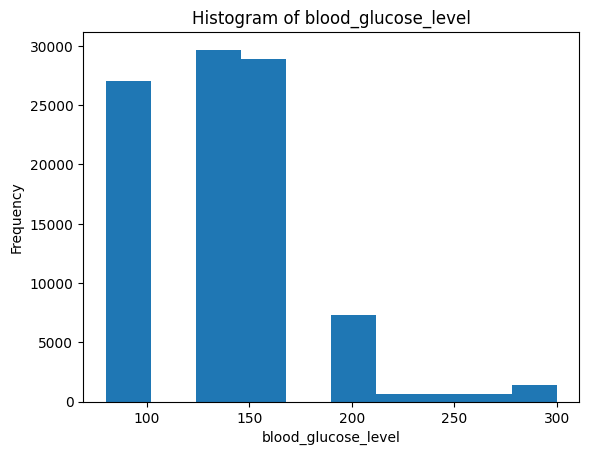

In [12]:
# histogram for all numerical features to see the distribution of predictors.
for column in data.columns:
    if data[column].dtype == "float64" or data[column].dtype == "int64":
        plt.hist(data[column])
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

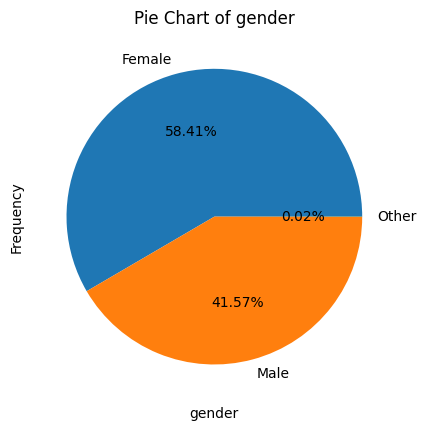

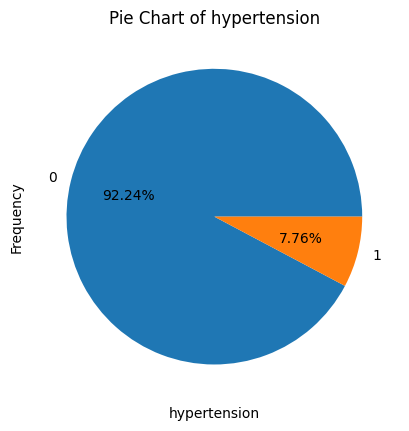

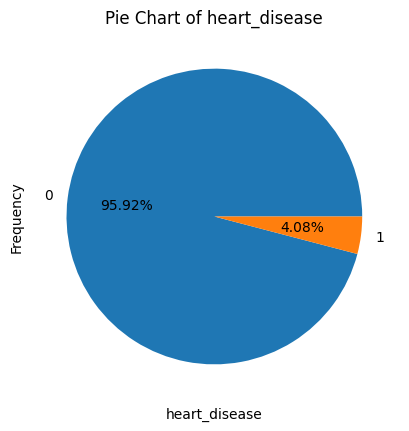

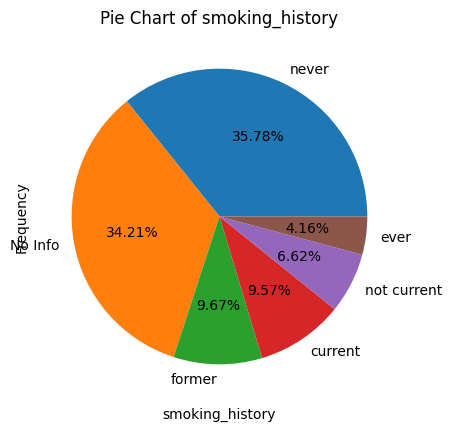

In [13]:
# piechart for all categorical features
for column in data.iloc[:,:-1].columns:
    if data[column].dtype == "category":
        # Count the frequencies of unique categories
        category_counts = data[column].value_counts()

        # Create a pie chart
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%')
        plt.title(f'Pie Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

All categorical features in the dataset are imbalanced. It is important to note that the value 'No Info' in the 'smoking_history' column accounts for approximately 34% of the total data in this column. Simply removing these values may result in a significant loss of information. Instead, we will handle the 'No Info' value by treating it as a separate class within this categorical feature.

### Distribution of Target Variable

diabetes
0    87664
1     8482
Name: count, dtype: int64


<Axes: ylabel='count'>

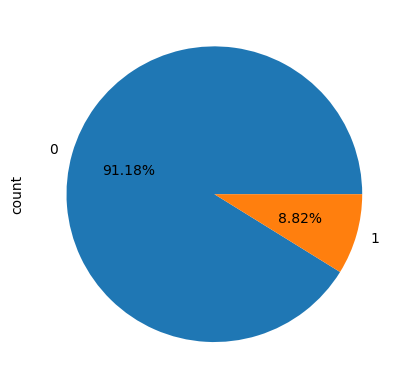

In [14]:
# distribution of y
category_counts = data['diabetes'].value_counts()
print(category_counts)

# Plot the percentage of each class of target varible
data['diabetes'].value_counts().plot.pie(autopct='%1.2f%%')

Based on the results, the dataset clearly demonstrates class imbalance, where the majority class (labeled as 0) significantly surpasses the minority class (labeled as 1). The data indicate that a substantial proportion of individuals are classified as having no diabetes. In order to reduce the impact of imbalanced data on models, a specific technique is required before building the model. In this project, the chosen method to tackle the problem is random oversampling. I will do it later.

In [15]:
# Encode multiple columns
for column in ['gender', 'hypertension', 'heart_disease','smoking_history','diabetes']:
    data[column] = label_encoder.fit_transform(data[column])

### Outlier detection

Next, I ploted the numeric features separated by diabetes status to look for any outliers within the dataset.

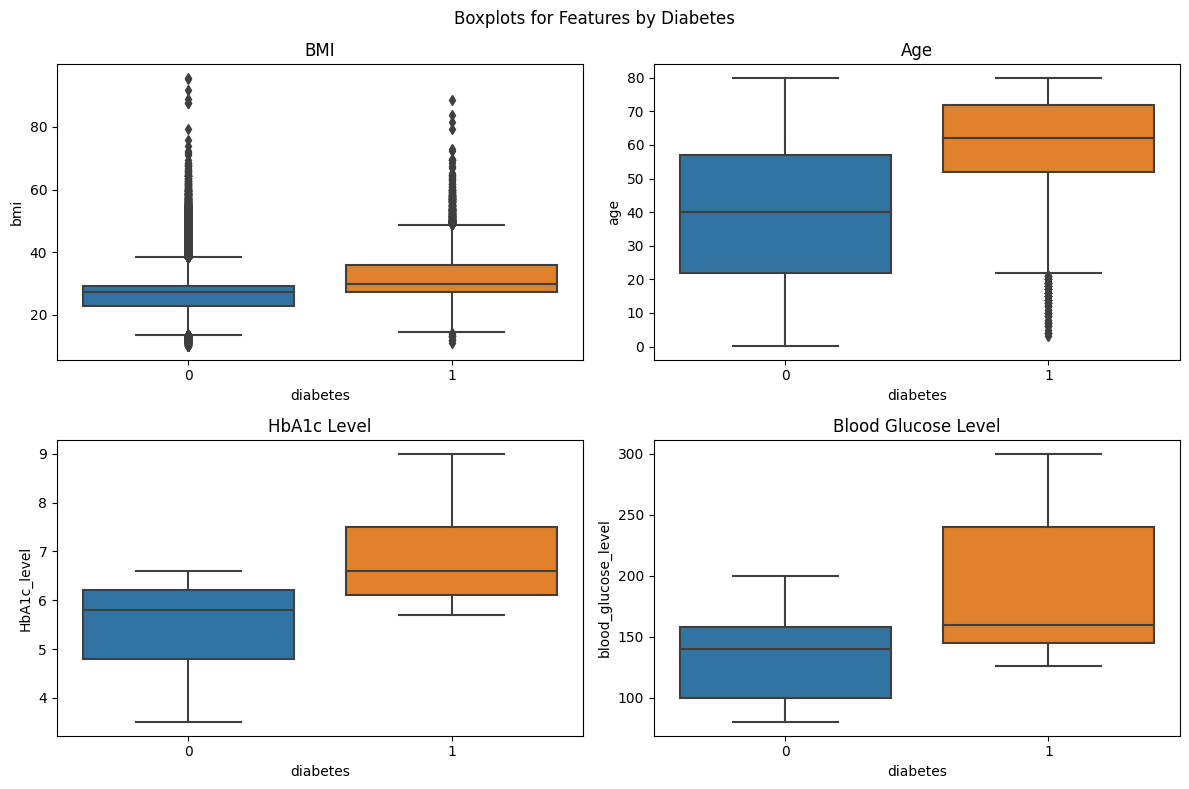

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the plot size and layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Boxplots for Features by Diabetes')

# Plot the boxplots for each variable
sns.boxplot(ax=axes[0, 0], x='diabetes', y='bmi', data=data)
axes[0, 0].set_title('BMI')

sns.boxplot(ax=axes[0, 1], x='diabetes', y='age', data=data)
axes[0, 1].set_title('Age')

sns.boxplot(ax=axes[1, 0], x='diabetes', y='HbA1c_level', data=data)
axes[1, 0].set_title('HbA1c Level')

sns.boxplot(ax=axes[1, 1], x='diabetes', y='blood_glucose_level', data=data)
axes[1, 1].set_title('Blood Glucose Level')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


It apprers that the BMI feature might have some outliers based on the data distribution. However, after looking into the dataset carefully, it is also clear that patients with diabetes have higher BMI values compared to patients without diabetes. Therefore, it will be inappropiate to remove outliers from the BMI data because that will introduce additonal bias in the dataset. The parameters of age and HbA1c level and blood glucose level do not show obvious outliers.

### Correlation Matrix

The correlation matrix reveals that there are certain associations between the target feature and each of the predictors. Specifically, the predictors 'blood_glucose_level' and 'HbA1c_level' exhibit stronger association with the target feature compared to the other predictors. Moreover, there is no indication of co-linearity among the predictors, suggesting that they are relatively independent of each other.

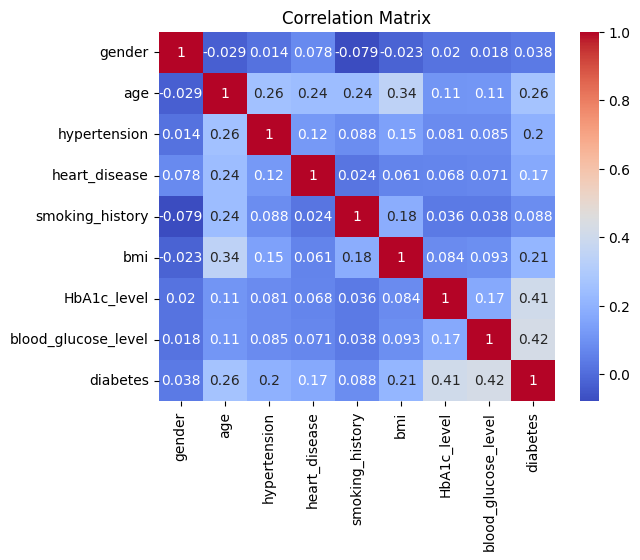

In [17]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

## Data preprocess

### Standardize original data

In [18]:
# split the target variable and predictors
y = data['diabetes']
X = data.drop('diabetes',axis=1)

# standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# split the data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

### Random Oversampling

The dataset is balanced after using random oversampling.

<Axes: ylabel='count'>

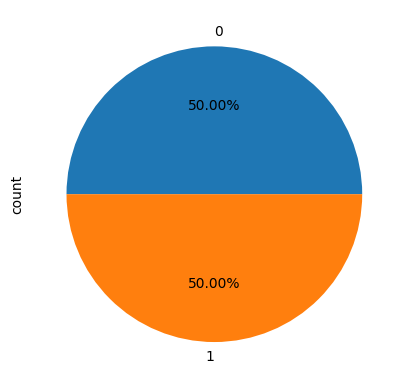

In [20]:
# random oversampling
from imblearn.over_sampling import RandomOverSampler

# resampling the training data
random_osample = RandomOverSampler(sampling_strategy="not majority",random_state=random_state)
X_ros, y_ros = random_osample.fit_resample(X_train,y_train)

# confirm the resampling dataset is balanced
y_ros.value_counts().plot.pie(autopct='%1.2f%%')

## Models

Next, I will train different models using the training dataset and evaluate them to predict response based on the test dataset. The model I have chosen to use are:
1. Logistic model
2. Random Forest
3. SVM
4. Gradient Boosting (GB)
5. Extreme Gradient Boosting (XGB)
6. K-nearest neighboors (KNN)

### Logistic Model

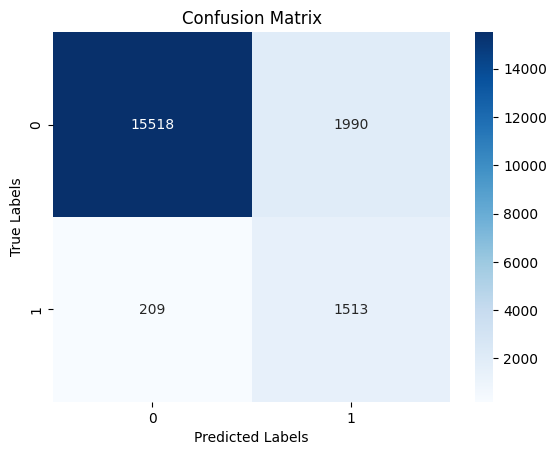

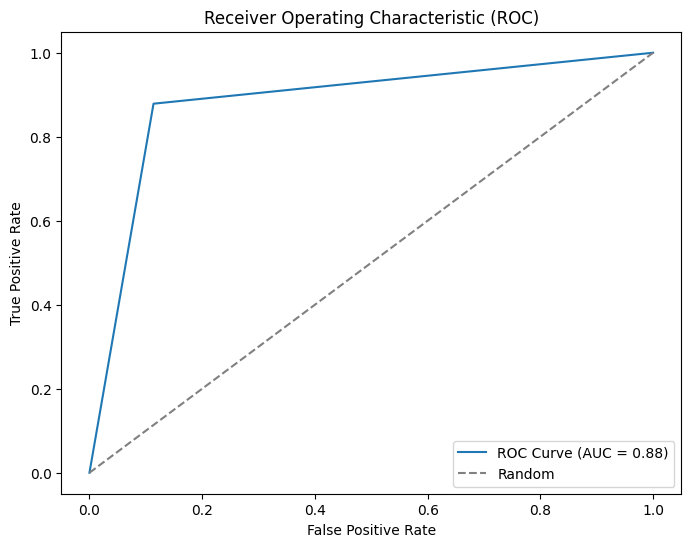

Accuracy: 0.8856474258970359
AUC score: 0.8824835873933987
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     17508
           1       0.43      0.88      0.58      1722

    accuracy                           0.89     19230
   macro avg       0.71      0.88      0.76     19230
weighted avg       0.94      0.89      0.90     19230

Running time: 0.07 seconds


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import time

# logistic model
logreg = LogisticRegression(max_iter=10000, random_state=random_state)

# Start the timer
start_time = time.time()

logreg.fit(X_ros, y_ros)

#stop the timer
end_time = time.time()
elapsed_time_log = end_time - start_time

log_pred = logreg.predict(X_test)
accuracy_log = accuracy_score(y_test,log_pred)

# confusion matrix
cm_log = confusion_matrix(y_test, log_pred)

# plot the confusion matrix
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()

# classification report
report_log = classification_report(y_test, log_pred)

# Compute the false positive rate, true positive rate, and thresholds
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log_pred)
# Calculate the area under the ROC curve (AUC)
auc_log = roc_auc_score(y_test,log_pred)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='ROC Curve (AUC = {:.2f})'.format(auc_log))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("Accuracy:",accuracy_log)
print("AUC score:",auc_log)
print(report_log)

print("Running time: {:.2f} seconds".format(elapsed_time_log))

### Random Forest

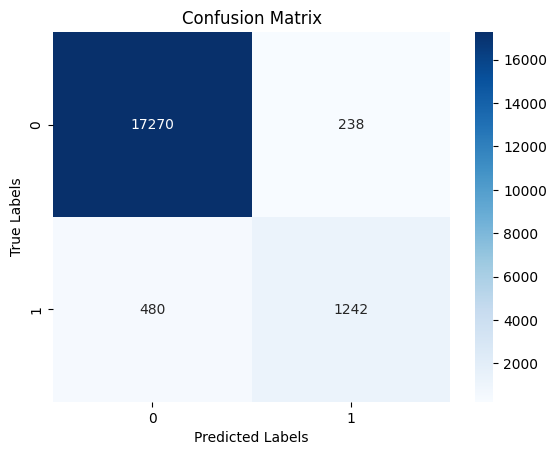

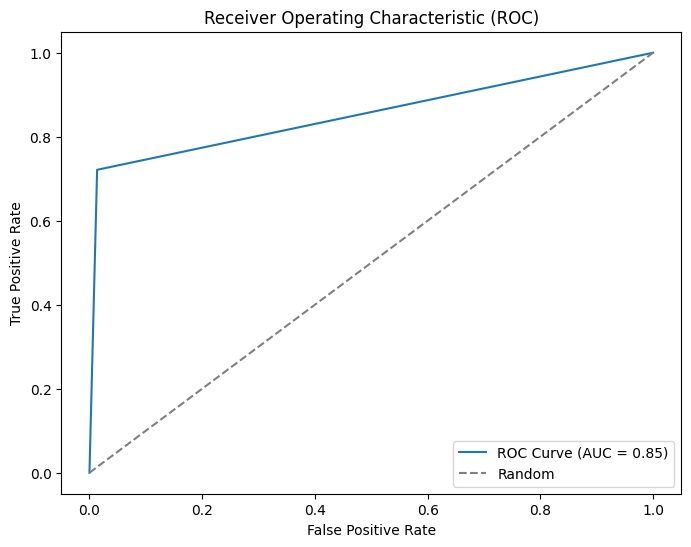

Accuracy: 0.96266250650026
AUC score: 0.8538302848513651
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17508
           1       0.84      0.72      0.78      1722

    accuracy                           0.96     19230
   macro avg       0.91      0.85      0.88     19230
weighted avg       0.96      0.96      0.96     19230

Running time: 6.79 seconds


In [22]:


rf = RandomForestClassifier(random_state=random_state)
# Start the timer
start_time = time.time()

# train the model
rf.fit(X_ros, y_ros)

#stop the timer
end_time = time.time()
elapsed_time_rf = end_time - start_time



# make predictions
rf_pred = rf.predict(X_test)

#accuracy
accuracy_rf = accuracy_score(y_test,rf_pred)

#confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()

#classification report
report_rf = classification_report(y_test, rf_pred)


# Compute the false positive rate, true positive rate, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_pred)
# Calculate the area under the ROC curve (AUC)
auc_rf = roc_auc_score(y_test,rf_pred)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC Curve (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


print("Accuracy:",accuracy_rf)
print("AUC score:",auc_rf)
print(report_rf)
print("Running time: {:.2f} seconds".format(elapsed_time_rf))

### SVM

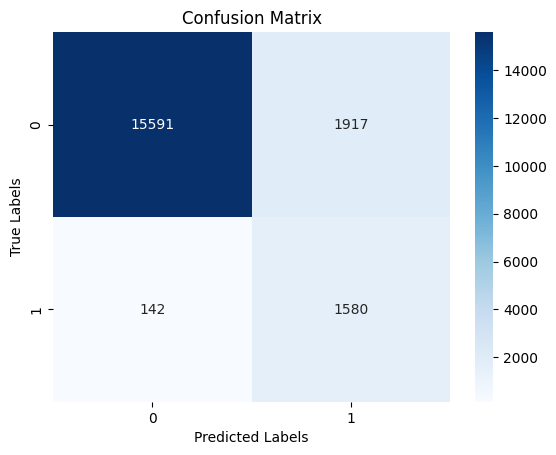

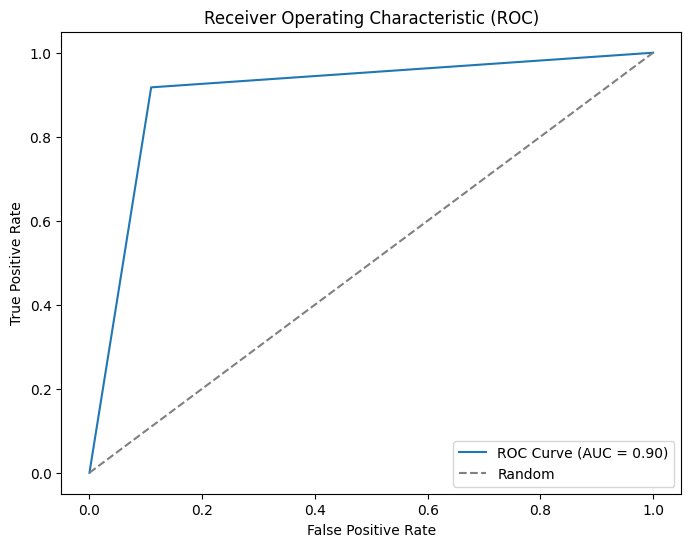

Accuracy: 0.8929277171086843
AUC score: 0.9040224717580575
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     17508
           1       0.45      0.92      0.61      1722

    accuracy                           0.89     19230
   macro avg       0.72      0.90      0.77     19230
weighted avg       0.94      0.89      0.91     19230

Running time: 137.71 seconds


In [23]:
from sklearn import svm

svm = svm.SVC(kernel ='rbf',random_state=random_state)
# Start the timer
start_time = time.time()

# train the model
svm.fit(X_ros, y_ros)

#stop the timer
end_time = time.time()
elapsed_time_svm = end_time - start_time



svm_pred = svm.predict(X_test)

# accuracy
accuracy_svm = accuracy_score(y_test, svm_pred)

#confusion matrix
cm_svm = confusion_matrix(y_test, svm_pred)


sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()

report_svm = classification_report(y_test, svm_pred)


# Compute the false positive rate, true positive rate, and thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_pred)
# Calculate the area under the ROC curve (AUC)
auc_svm = roc_auc_score(y_test,svm_pred)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='ROC Curve (AUC = {:.2f})'.format(auc_svm))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("Accuracy:", accuracy_svm)
print("AUC score:",auc_svm)
print(report_svm)
print("Running time: {:.2f} seconds".format(elapsed_time_svm))

### Gradient Boosting

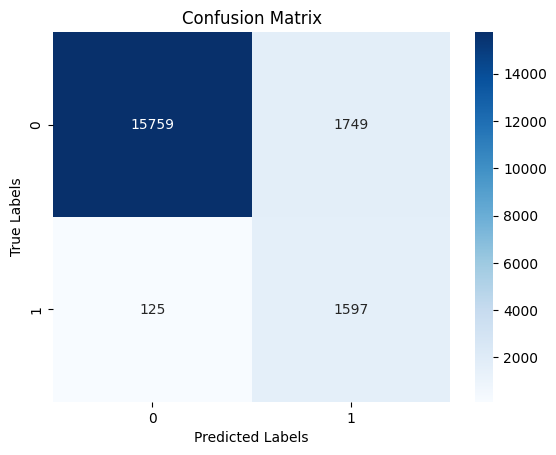

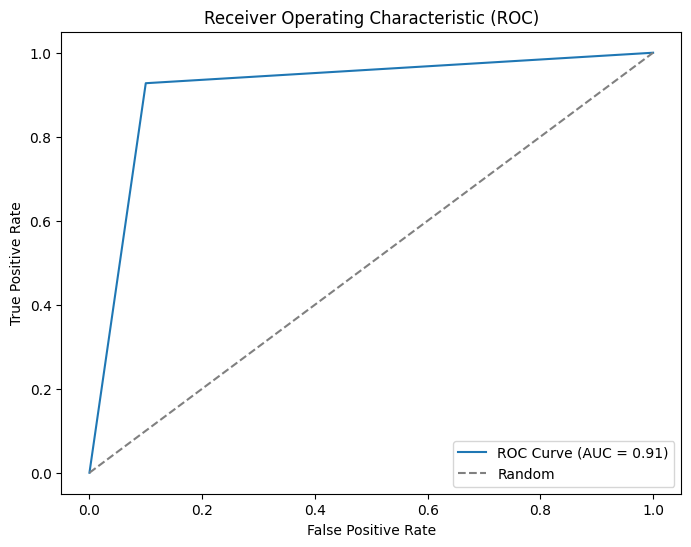

Accuracy: 0.902548101924077
AUC score: 0.9137563992647662
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     17508
           1       0.48      0.93      0.63      1722

    accuracy                           0.90     19230
   macro avg       0.73      0.91      0.79     19230
weighted avg       0.95      0.90      0.92     19230

Running time: 11.36 seconds


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=random_state)

# Start the timer
start_time = time.time()

# Train the model
gb.fit(X_ros, y_ros)

#stop the timer
end_time = time.time()
elapsed_time_gb = end_time - start_time




# Make predictions on the test set
gb_pred = gb.predict(X_test)

# Evaluate the model's accuracy
accuracy_gb = accuracy_score(y_test, gb_pred)

#confusion matrix
cm_gb = confusion_matrix(y_test, gb_pred)


#plot confusion matrix
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()

report_gb = classification_report(y_test, gb_pred)


# Compute the false positive rate, true positive rate, and thresholds
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_pred)
# Calculate the area under the ROC curve (AUC)
auc_gb = roc_auc_score(y_test,gb_pred)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label='ROC Curve (AUC = {:.2f})'.format(auc_gb))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("Accuracy:", accuracy_gb)
print("AUC score:",auc_gb)
print(report_gb)
print("Running time: {:.2f} seconds".format(elapsed_time_gb))

#### Extreme Gradient Boosting

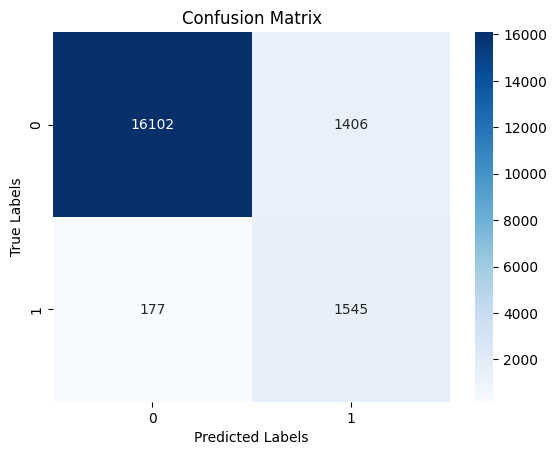

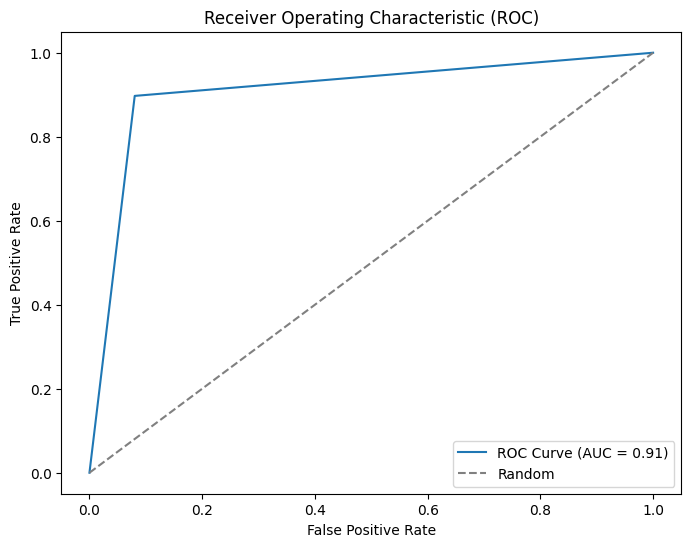

Accuracy: 0.9176807072282891
AUC score: 0.9084531988960347
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17508
           1       0.52      0.90      0.66      1722

    accuracy                           0.92     19230
   macro avg       0.76      0.91      0.81     19230
weighted avg       0.95      0.92      0.93     19230

Running time: 3.05 seconds


In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=random_state)
# Start the timer
start_time = time.time()

# Train the model
xgb.fit(X_ros, y_ros)

#stop the timer
end_time = time.time()
elapsed_time_xgb = end_time - start_time

# Make predictions on the test set
xgb_pred = xgb.predict(X_test)

# Evaluate the model's accuracy
accuracy_xgb = accuracy_score(y_test, xgb_pred)

#confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_pred)


#plot confusion matrix
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()

report_xgb = classification_report(y_test, xgb_pred)


# Compute the false positive rate, true positive rate, and thresholds
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_pred)
# Calculate the area under the ROC curve (AUC)
auc_xgb = roc_auc_score(y_test,xgb_pred)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='ROC Curve (AUC = {:.2f})'.format(auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("Accuracy:", accuracy_xgb)
print("AUC score:",auc_xgb)
print(report_xgb)
print("Running time: {:.2f} seconds".format(elapsed_time_xgb))

### K-nearest neighbors

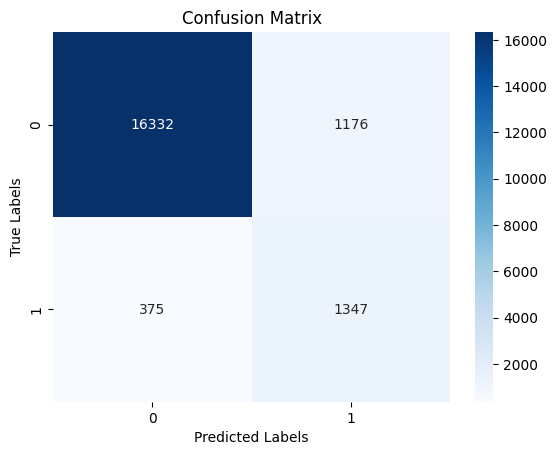

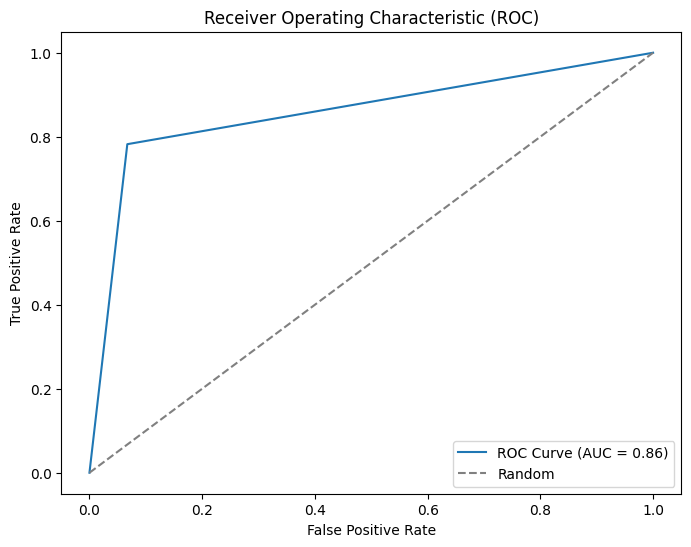

Accuracy: 0.9193447737909516
AUC score: 0.8575303355598914
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     17508
           1       0.53      0.78      0.63      1722

    accuracy                           0.92     19230
   macro avg       0.76      0.86      0.79     19230
weighted avg       0.94      0.92      0.93     19230

Running time: 0.07 seconds


In [26]:


knn = KNeighborsClassifier()
# Start the timer
start_time = time.time()

# Train the model
knn.fit(X_ros, y_ros)

#stop the timer
end_time = time.time()
elapsed_time_knn = end_time - start_time


knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)


auc_knn = roc_auc_score(y_test,knn_pred)

#confusion matrix
cm_knn = confusion_matrix(y_test, knn_pred)

#plot confusion matrix
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()

report_knn = classification_report(y_test, knn_pred)

# Compute the false positive rate, true positive rate, and thresholds
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_pred)
# Calculate the area under the ROC curve (AUC)
auc_knn = roc_auc_score(y_test,knn_pred)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='ROC Curve (AUC = {:.2f})'.format(auc_knn))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("Accuracy:", knn_accuracy)
print("AUC score:",auc_knn)
print(report_knn)
print("Running time: {:.2f} seconds".format(elapsed_time_knn))

### Model comparison

Now, I will summarize the performance of different models in a table for easy comparison.

In [27]:
## print accurary and AUC score for each model in a table

classification_list = [
    [accuracy_log, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_xgb, knn_accuracy],
    [auc_log, auc_rf, auc_svm, auc_gb, auc_xgb, auc_knn],
    [elapsed_time_log, elapsed_time_rf, elapsed_time_svm, elapsed_time_gb, elapsed_time_xgb, elapsed_time_knn],

]

row_names = ['Accuracy', 'AUC', 'Running Time']
column_names = ['Logistic', 'Random forest', 'SVM', 'GB', 'XGB', 'KNN']


# Printing the table
print(tabulate(classification_list, headers=column_names, showindex=row_names, tablefmt="fancy_grid"))


╒══════════════╤════════════╤═════════════════╤════════════╤═══════════╤══════════╤═══════════╕
│              │   Logistic │   Random forest │        SVM │        GB │      XGB │       KNN │
╞══════════════╪════════════╪═════════════════╪════════════╪═══════════╪══════════╪═══════════╡
│ Accuracy     │  0.885647  │        0.962663 │   0.892928 │  0.902548 │ 0.917681 │ 0.919345  │
├──────────────┼────────────┼─────────────────┼────────────┼───────────┼──────────┼───────────┤
│ AUC          │  0.882484  │        0.85383  │   0.904022 │  0.913756 │ 0.908453 │ 0.85753   │
├──────────────┼────────────┼─────────────────┼────────────┼───────────┼──────────┼───────────┤
│ Running Time │  0.0735872 │        6.78864  │ 137.715    │ 11.3566   │ 3.04599  │ 0.0695601 │
╘══════════════╧════════════╧═════════════════╧════════════╧═══════════╧══════════╧═══════════╛


Here I compared the accurary, AUC and runnning time of each model. In the current setting, random forest model gives the highest accurary. The processing time of random forest model is acceptable for a dataset of this size. In the next section, I will perform detailed tunning to optimize the random forest model.

## Optimization

Now let's take a second look at the random forest classifier again. Let's see the parameter settings for the current random forest model.

In [28]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2023, 'verbose': 0, 'warm_start': False}


Among all the parameters, I will optimize the 'n_estimators' and 'max_depth' parameters together in order to improve current model. I will iterate through different combinations of n_estimators and max_depth values and plot a 3-dimentional plot to visualize the accuracy value in response to changing n_estimators and max_depth variables.

In [29]:


# Define a range of values for max_depth and n_estimators
max_depth_range = [2, 4, 6, 8, 10]
n_estimators_range = range(10, 200, 10)

# Create lists to store accuracy values
accuracy_values = []

# Iterate over different values of max_depth and n_estimators
for max_depth in max_depth_range:
    accuracy_row = []
    for n_estimators in n_estimators_range:
        # Create and train a Random Forest Classifier
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
        rf_classifier.fit(X_ros, y_ros)
        
        # Calculate accuracy
        accuracy = rf_classifier.score(X_test, y_test)
        accuracy_row.append(accuracy)
    accuracy_values.append(accuracy_row)

# Convert the accuracy values into a NumPy array
accuracy_values = np.array(accuracy_values)

# Create a meshgrid for max_depth and n_estimators
max_depth_mesh, n_estimators_mesh = np.meshgrid(max_depth_range, n_estimators_range)



In [34]:
# Create a 3D scatter plot of accuracy

fig = go.Figure(data=go.Scatter3d(
    x=max_depth_mesh.flatten(),
    y=n_estimators_mesh.flatten(),
    z=accuracy_values.flatten(),
    mode='markers',
    marker=dict(size=8, color=accuracy_values.flatten(), colorscale='Viridis', opacity=0.8),
    text=accuracy_values.flatten(),
    hovertemplate='Max Depth: %{x}<br>n_estimators: %{y}<br>Accuracy: %{z}<extra></extra>'
))

# Set plot layout
fig.update_layout(
    scene=dict(
        xaxis_title='Max Depth',
        yaxis_title='n_estimators',
        zaxis_title='Accuracy',
    ),
    title='Accuracy vs. max_depth and n_estimators',
    width=800,
    height=600,
)


# Show the interactive plot
fig.show()

From the color-coded 3D plot, it is easy to tell that the accuracy reaches the highest when max_depth=2 and n_estimators=10. Now I will use these parameters to do the training and prediction.

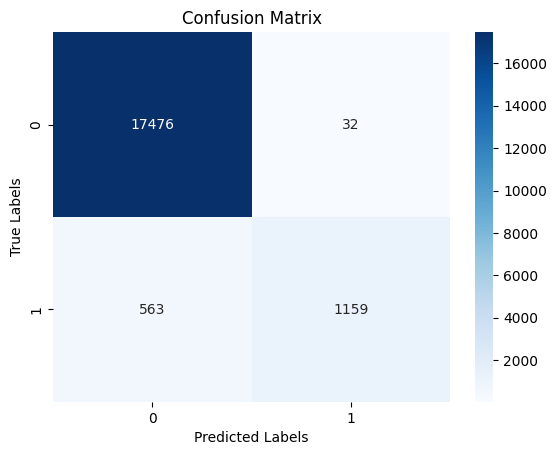

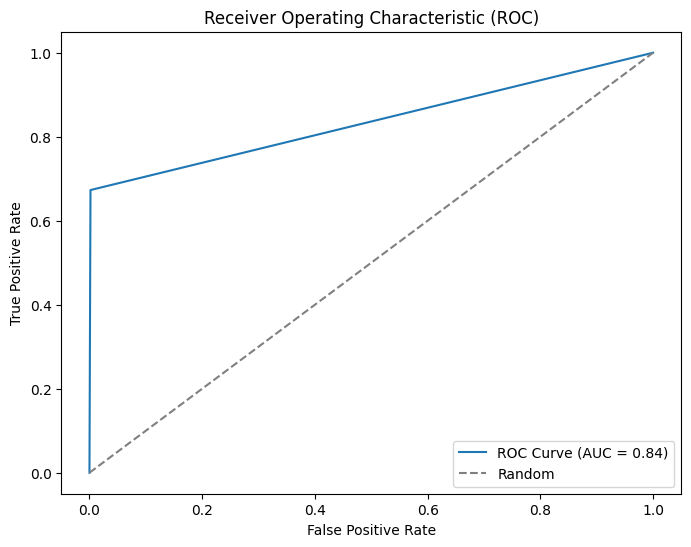

Accuracy: 0.969058762350494
AUC score: 0.8356134258982852
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17508
           1       0.97      0.67      0.80      1722

    accuracy                           0.97     19230
   macro avg       0.97      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230

Running time: 0.28 seconds


In [31]:
rf_op = RandomForestClassifier(n_estimators = 10,
                               max_depth = 2,
                               random_state=random_state)
# Start the timer
start_time = time.time()

# train the model
rf_op.fit(X_ros, y_ros)

#stop the timer
end_time = time.time()
elapsed_time_rf_op = end_time - start_time



# make predictions
rf_op_pred = rf_op.predict(X_test)

#accuracy
accuracy_rf_op = accuracy_score(y_test,rf_op_pred)

#confusion matrix
cm_rf_op = confusion_matrix(y_test, rf_op_pred)

sns.heatmap(cm_rf_op, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()

#classification report
report_rf_op = classification_report(y_test, rf_op_pred)


# Compute the false positive rate, true positive rate, and thresholds
fpr_rf_op, tpr_rf_op, thresholds_rf_op = roc_curve(y_test, rf_op_pred)
# Calculate the area under the ROC curve (AUC)
auc_rf_op = roc_auc_score(y_test,rf_op_pred)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_op, tpr_rf_op, label='ROC Curve (AUC = {:.2f})'.format(auc_rf_op))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


print("Accuracy:",accuracy_rf_op)
print("AUC score:",auc_rf_op)
print(report_rf_op)
print("Running time: {:.2f} seconds".format(elapsed_time_rf_op))

With the new parameters, I have improved the accuracy of the random forest model from 0.96266250650026 to 0.969058762350494. Precision of the positive response also increased from 0.84 to 0.97. That's a good improvement!

## Conclusion and Discussion

Using the diabetes prediction dataset from Kaggle, I performed data cleaning, exploratory data analysis, and built several classification models to predict the occurence of diabetes based on clinical inputs. By initially comparing different models, I found random forest model gives the highest accuracy with reasonable running time. I further optimized the random forest model by modifying the n_estimators and max_depth parameters, and improved the model accuracy and response accuracy.

### Learning and take-aways

In this project, I learned how to read the data, clean the data, and explore the data by data visualization for a large dataset. There are different ways to do classification on the same dataset, but each model will have a different performance. One needs to define a preferred metric to select the best model that fits our purposes. In this project, I mainly focused on the accuracy. Other metics like AUC score, precision, recall and f1-score are other important indicators of how the model performs. 

Additionally, I optimized the random forest model by fine tuning two different parameters based on the accuracy readout. There are other parameters in the model that can be optimized either similarly, or using a more sophisticated method such as the GridSearchCV function. Again, other metics mentioned above can be used as the decision maker for choosing the best model.

### Challenges

I have also encountered several challenges working with this dataset.
1. Outliers. I examined the possible outliers in the features. For the BMI feature, there are data above the $Q3+(1.5*IQR)$ or below the $Q1-(1.5*IQR)$. However, I did not count them as outliers because BMI is directly associated with the response. Diabetes patients tend to have higher BMI compared to not diabetic patients. Removing the high BMI values will bias towards no diabetic group, and vice versa. A more complicated analysis of this matter is warranted.
2. Imbalanced data. The orignal response data are imbalanced, with much more 0s than 1s. Imbalanced data will underperform in precision and recall for minority target class. To overcome this challenge, I performed random oversampling to re-balance the data. This should improve the model.
3. Model optimization. With the random forest model, I optimized the model based on accuracy. It is noteworthy that the AUC score and recall value dropped from 0.8538302848513651 and 0.72 to 0.8356134258982852 and 0.67, respectively. This indicates a potential increase of false-negative rate, i.e. patients with disease are not diagnosed rate. This will need further optimization to get better AUC and recall score.

### Ways to improve

Based on the experience learned from this project, I propose several ways to improve the model:
1. Increase the size of the observations, especially the minority response class
2. Try other models for better AUC and recall
3. Perform hyperparameter tuning with more parameters